In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [55]:
df = pd.read_csv('E:\\Notes\\Statistics\\Feature Engineering\\Datasets\\concrete_data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [56]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [57]:
df.shape

(1030, 9)

In [58]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


**Minimum value in some columns is 0, no -ve values -> Can apply box-cox but need to add a small int at the end**

In [59]:
X= df.drop(columns=['Strength'])
y= df.iloc[:,-1]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Strength']), df.iloc[:,-1], test_size=0.2, random_state=42)

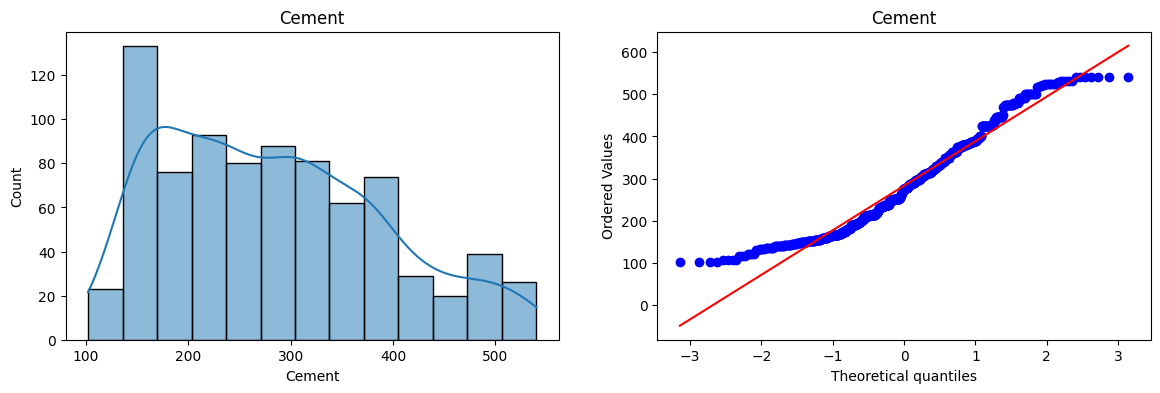

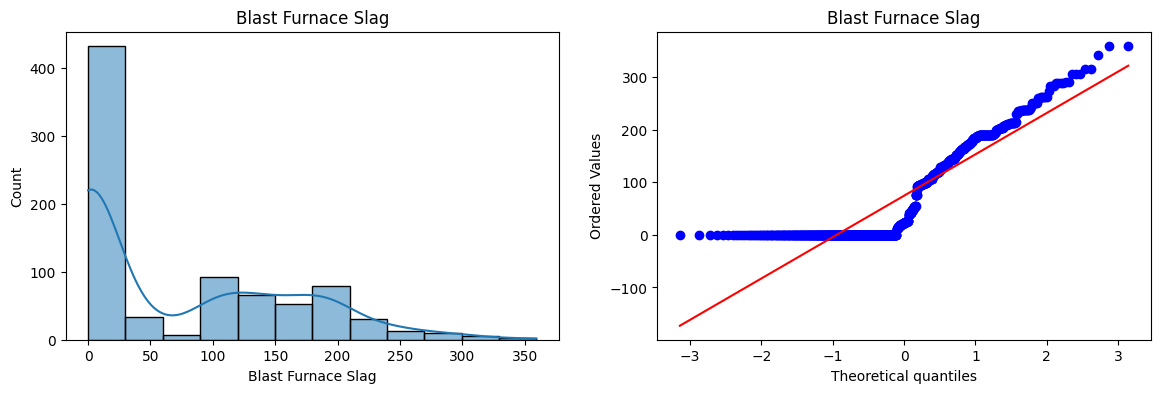

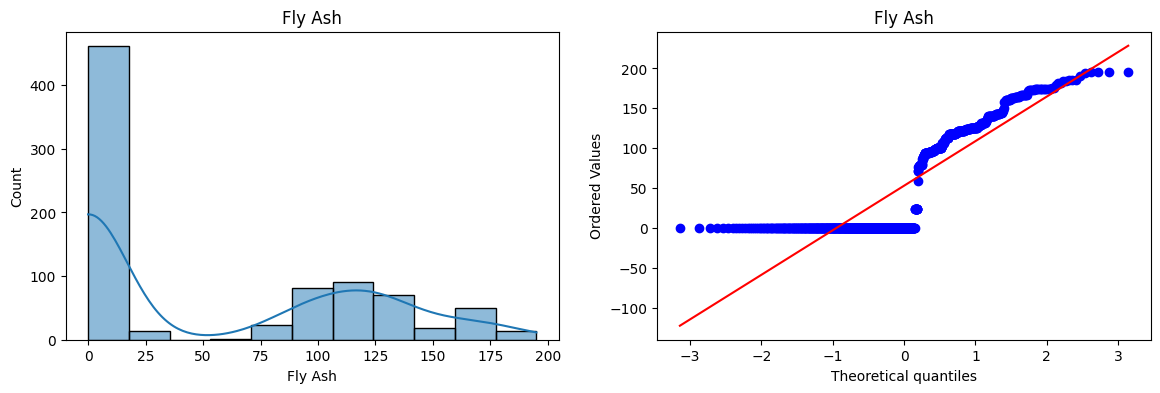

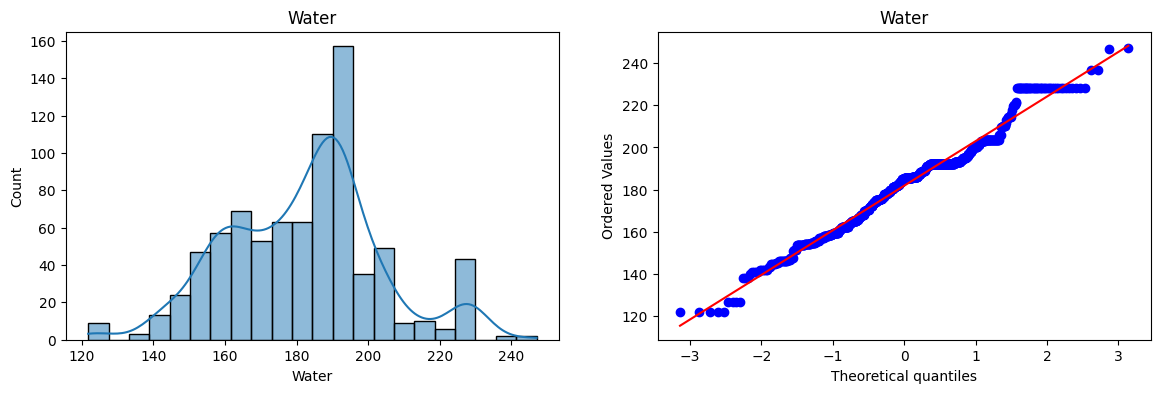

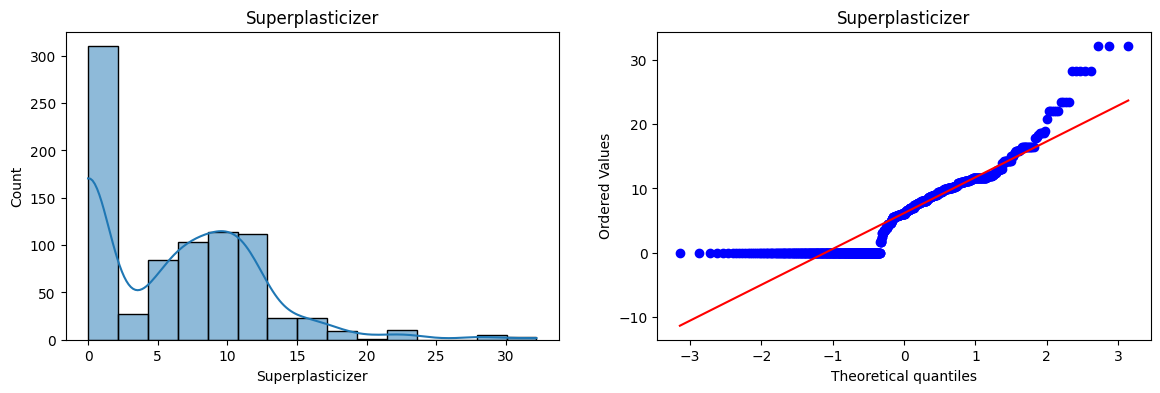

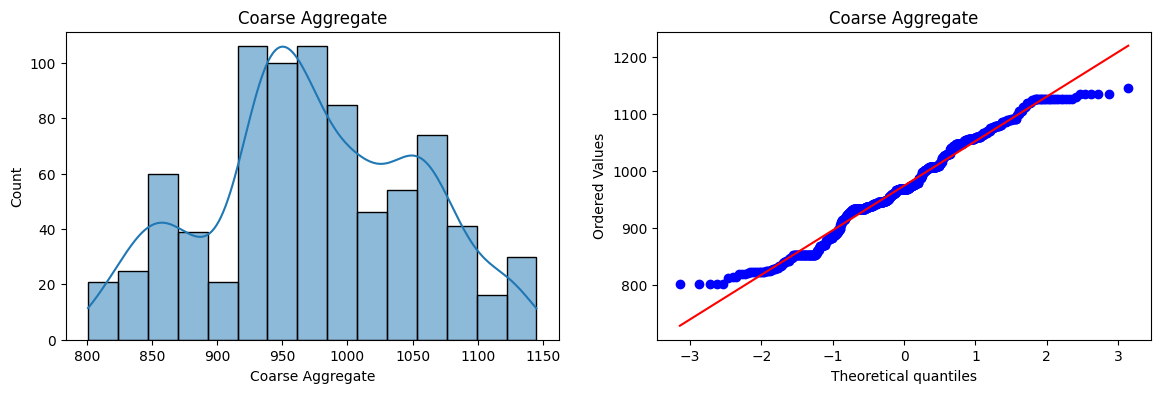

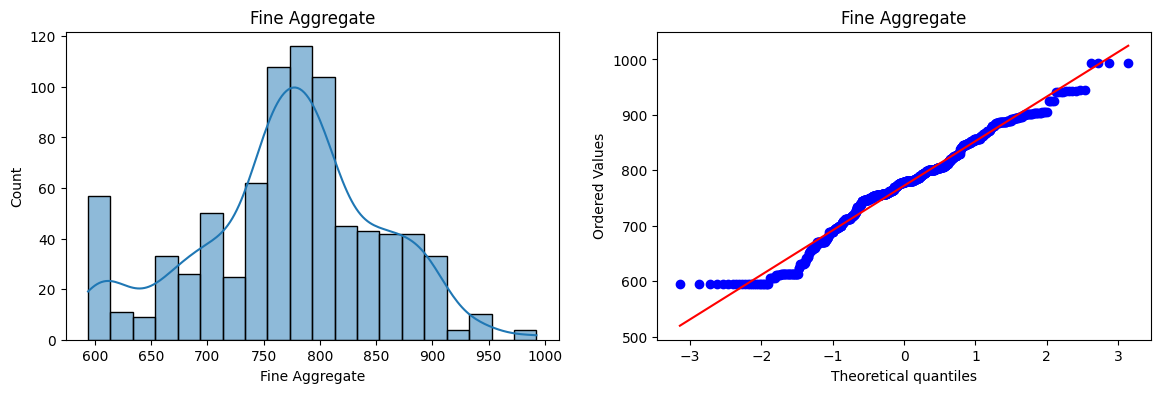

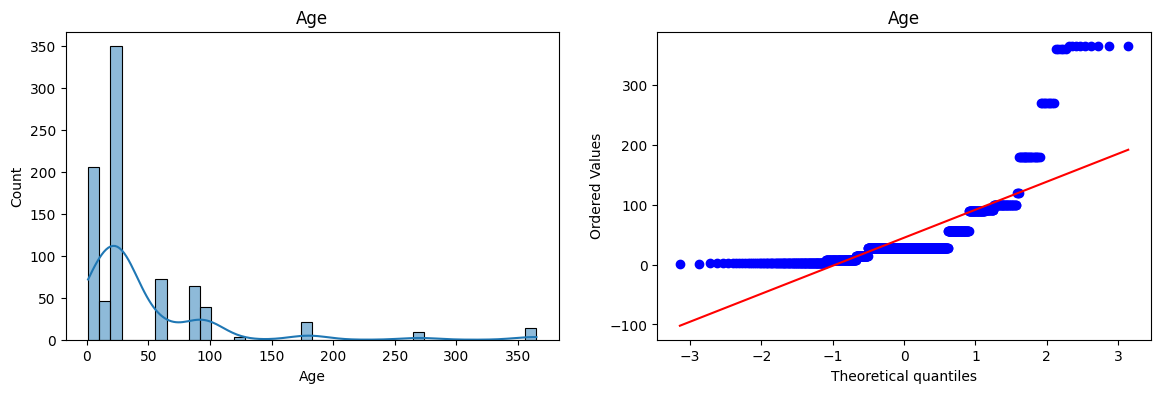

In [61]:
# Plotting Hist and Q-Q plot for each column to understand data distribution

for col in X_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col] , kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(X_train[col], dist='norm', plot=plt)
    plt.title(col)

    plt.show()

In [62]:
# Training Linear Model without Transformation
lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

r2_score(y_test, y_pred)

0.6275531792314848

In [63]:
# Cross-Validation
print(np.mean(cross_val_score(lr, X, y, scoring='r2')))

0.46099404916628683


#### **Applying Box-Cox Transform - For positive data only**

In [64]:
# Applying Box-Cox Transformation
pt = PowerTransformer(method='box-cox')  # Default method is Yeo-Johnson

X_train_transform = pt.fit_transform(X_train + 0.000001)
X_test_transform = pt.fit_transform(X_test+ 0.000001)

pd.DataFrame({'cols': X_train.columns , 'Box-Cox Lambdas': pt.lambdas_})

,cols,Box-Cox Lambdas
0,Cement,0.215602
1,Blast Furnace Slag,0.025996
2,Fly Ash,-0.006544
3,Water,0.959062
4,Superplasticizer,0.103365
5,Coarse Aggregate,1.192492
6,Fine Aggregate,1.973781
7,Age,-0.014692


In [65]:
# Applying Linear Regression on Transformed Data 
lr = LinearRegression()

lr.fit(X_train_transform, y_train)

y_pred = lr.predict(X_test_transform)

r2_score(y_test , y_pred)

0.8055320988034843

In [66]:
# Cross - validation 
pt = PowerTransformer(method='box-cox')
X_transformed = pt.fit_transform(X+0.000001)

lr= LinearRegression()

print(np.mean(cross_val_score(lr, X_transformed, y, scoring='r2')))

0.6662950317141857


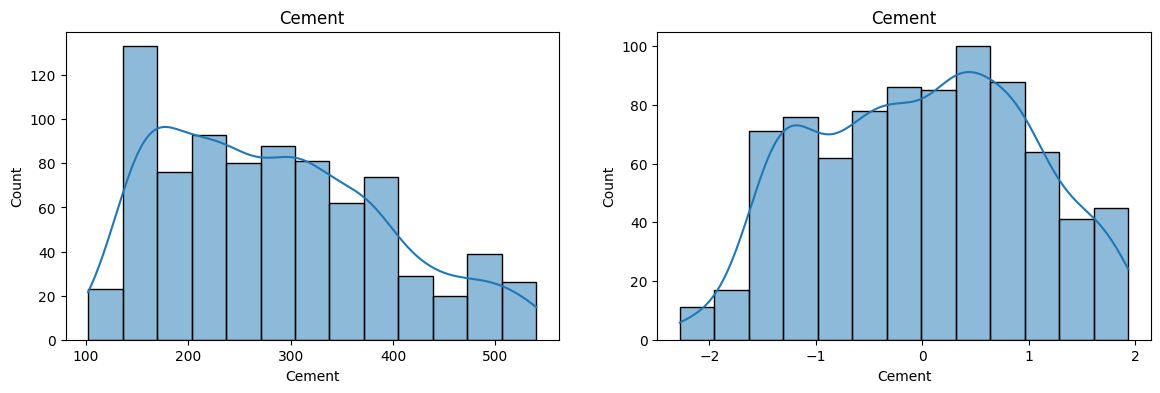

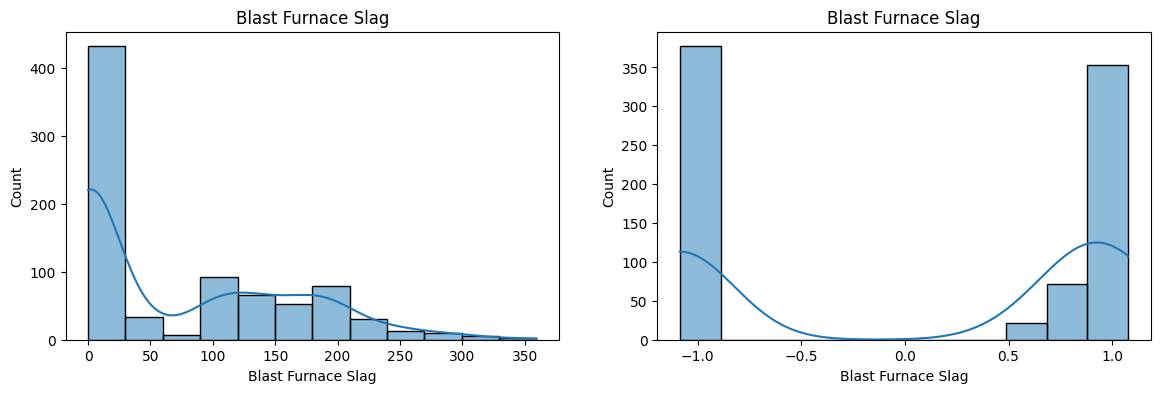

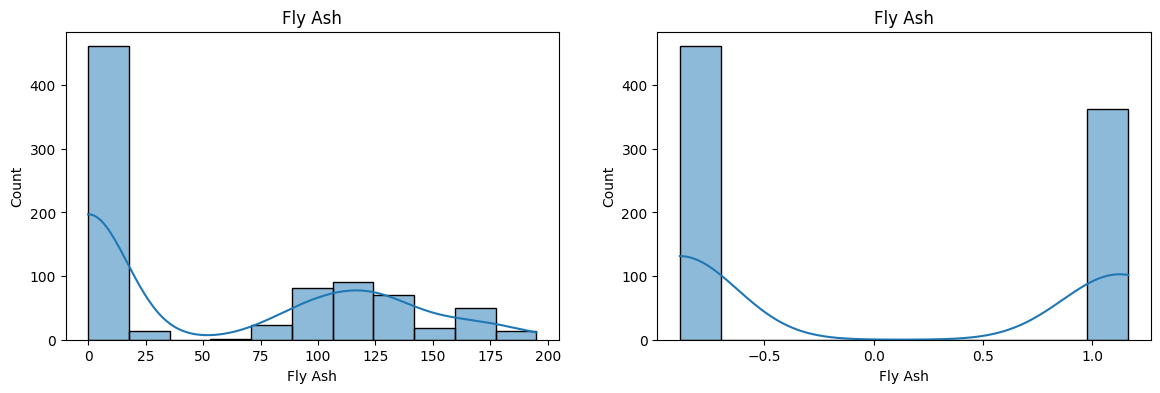

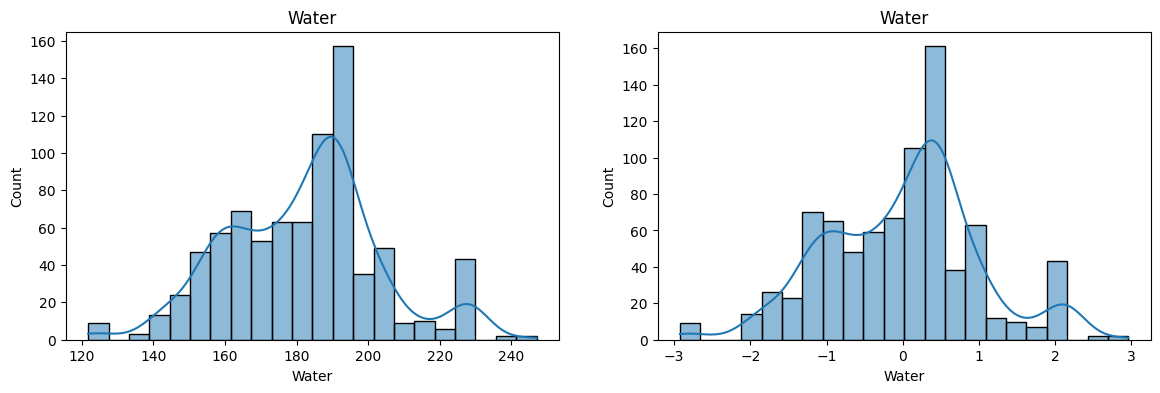

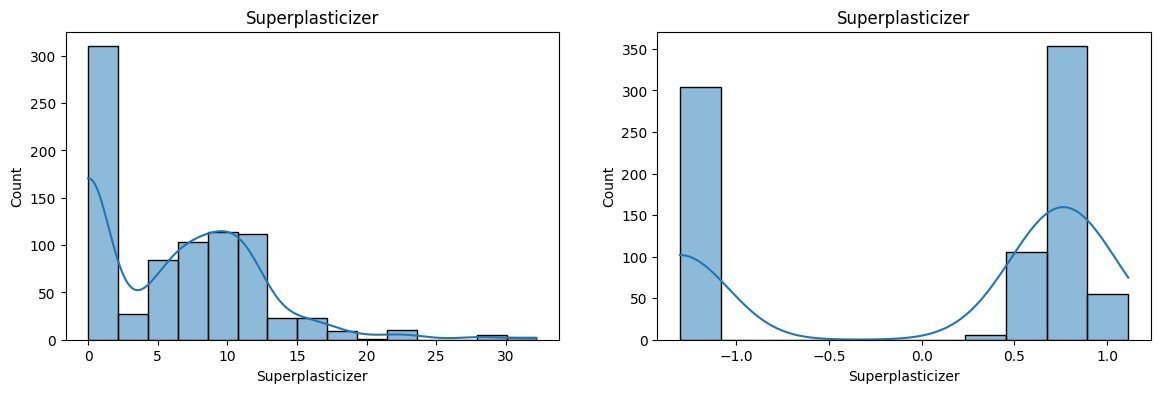

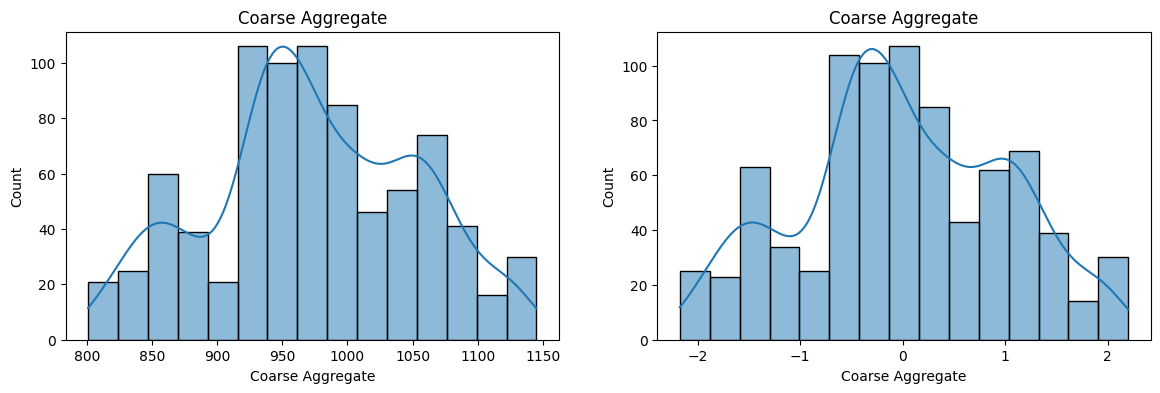

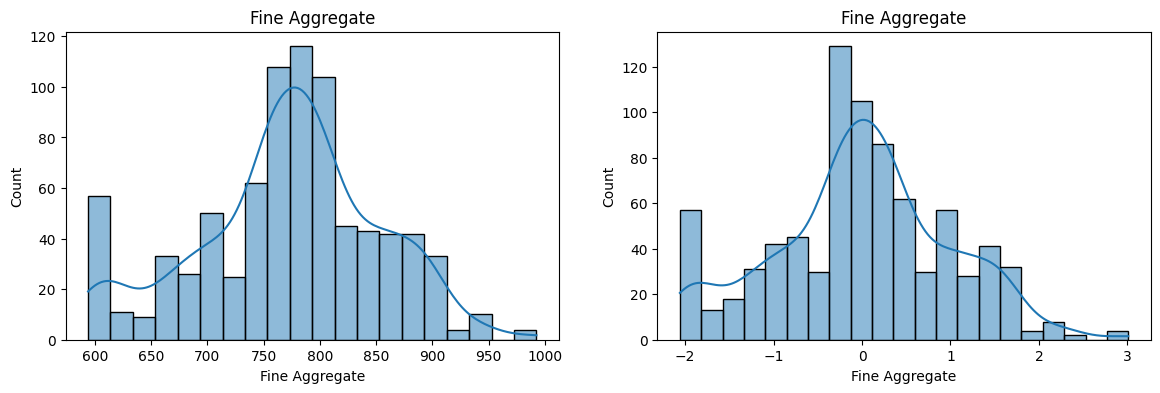

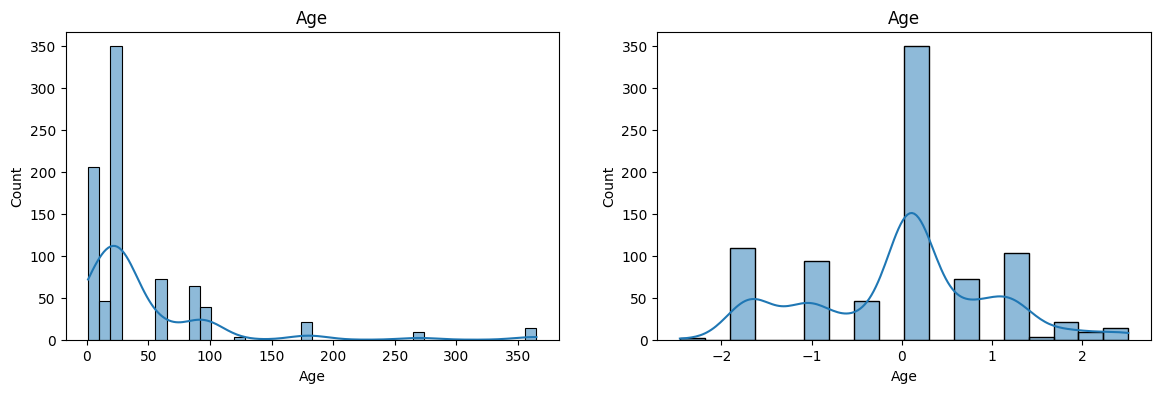

In [67]:
# Before and After Comparision of Data using Box-Cox

# Converting X_train_transfrom to pd
X_train_transform = pd.DataFrame(X_train_transform, columns=X_train.columns)

for col in X_train_transform.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(col)

    
    plt.subplot(122)
    sns.histplot(X_train_transform[col], kde=True)
    plt.title(col)

    plt.show()

**Applying Yeo-Johnson Transform**

In [68]:
# Yeo-Johnson
pt1 = PowerTransformer(method='yeo-johnson')
X_train_transform2 = pt1.fit_transform(X_train)
X_test_transform2 = pt1.fit_transform(X_test)

pd.DataFrame({'columns': X_train.columns, 'Yeo-Johnson Lambda': pt1.lambdas_})

,columns,Yeo-Johnson Lambda
0,Cement,0.213025
1,Blast Furnace Slag,0.020476
2,Fly Ash,-0.038218
3,Water,0.958936
4,Superplasticizer,0.304951
5,Coarse Aggregate,1.192751
6,Fine Aggregate,1.975085
7,Age,-0.062443


In [69]:
lr = LinearRegression()

lr.fit(X_train_transform2, y_train)

y_pred = lr.predict(X_test_transform2)

r2_score(y_test, y_pred)

0.8153845515001846

In [70]:
# Cross-Validation
pt = PowerTransformer(method='yeo-johnson')
X_transform = pt.fit_transform(X)

lr = LinearRegression()
np.mean(cross_val_score(lr, X_transform, y, scoring='r2'))

np.float64(0.6834625134285742)

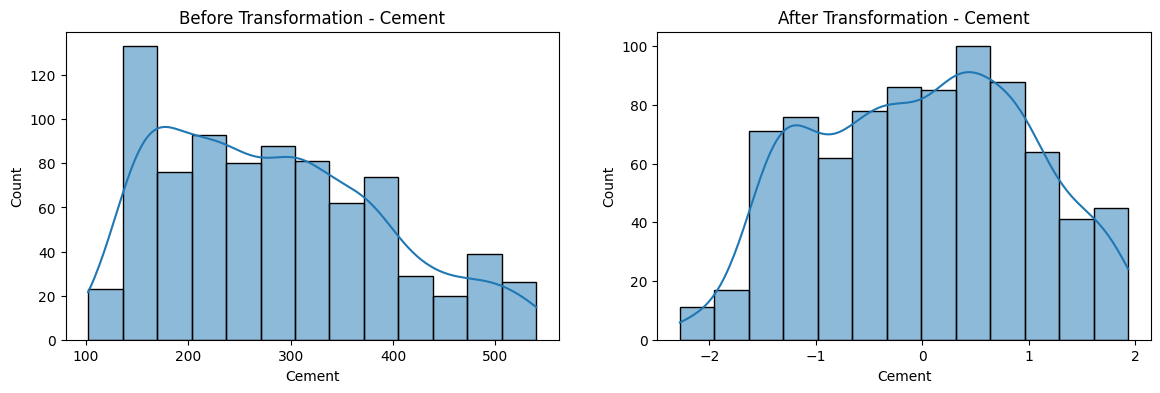

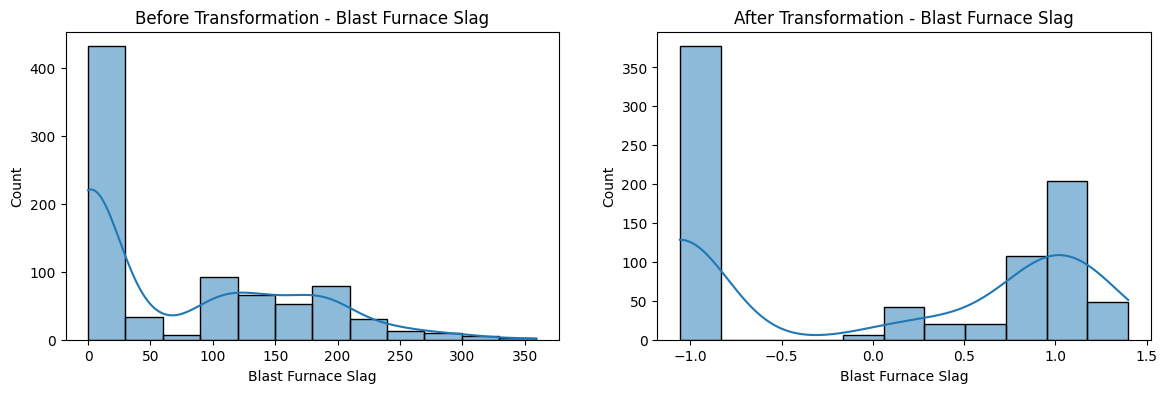

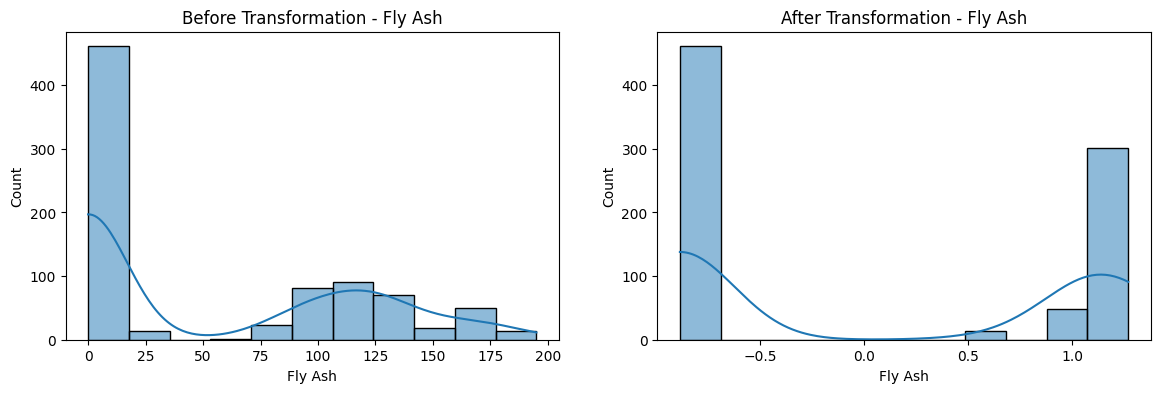

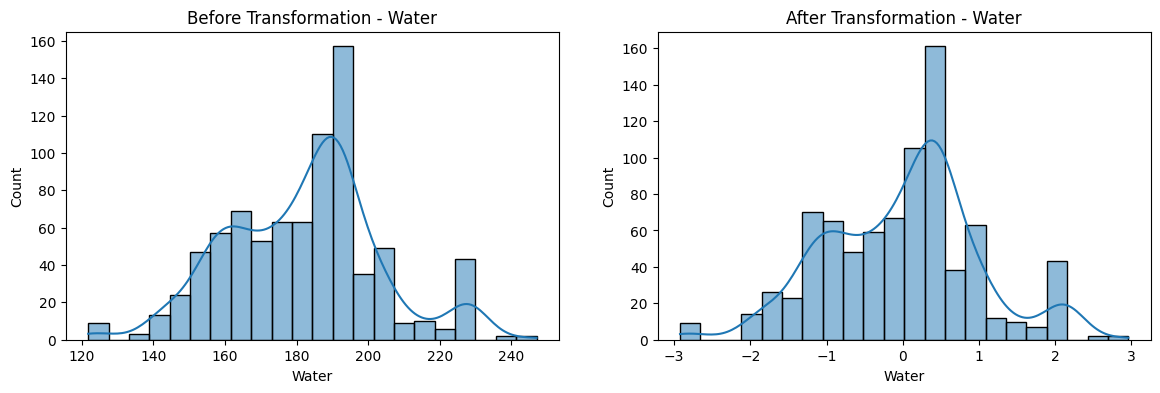

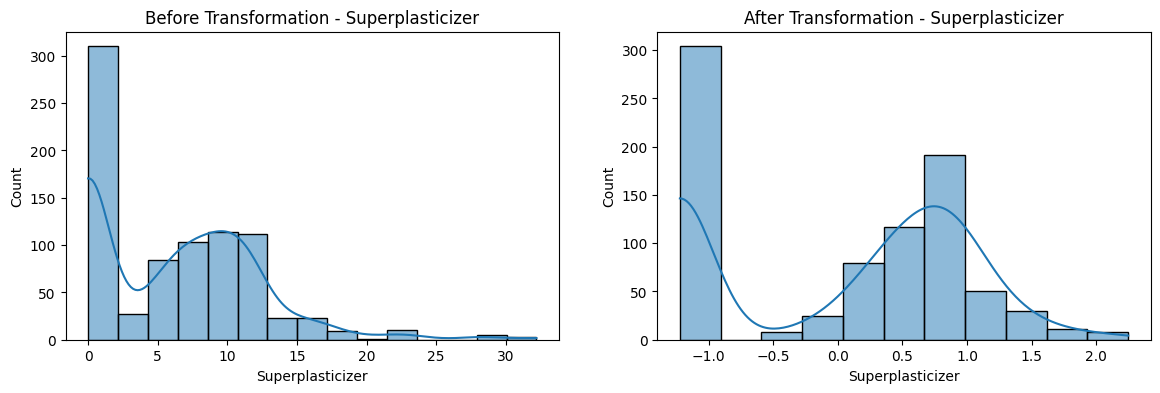

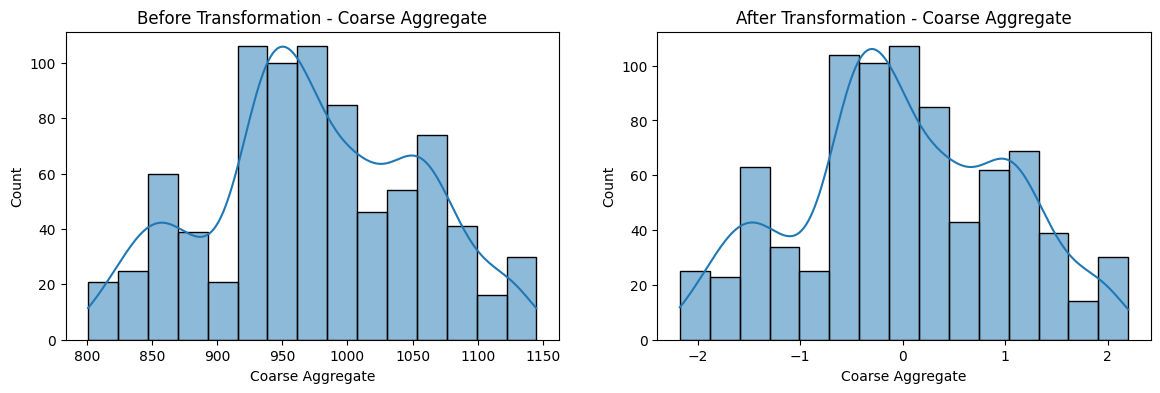

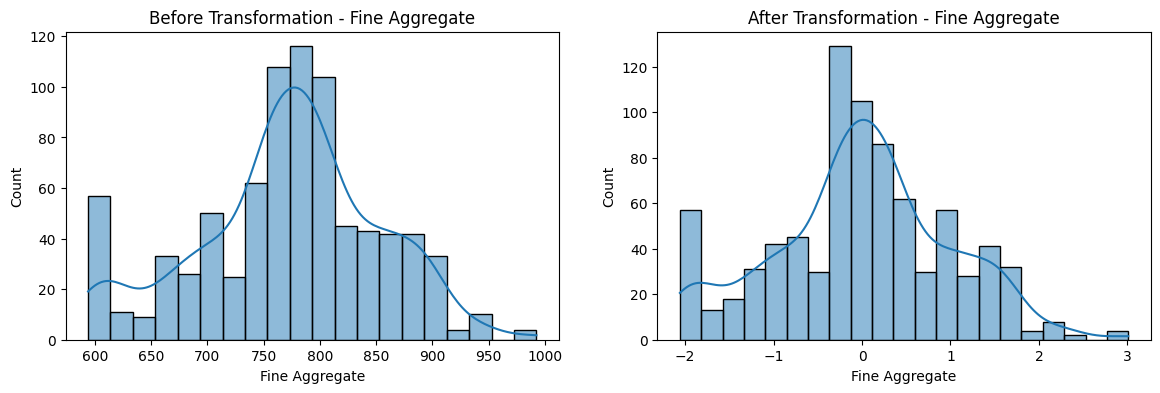

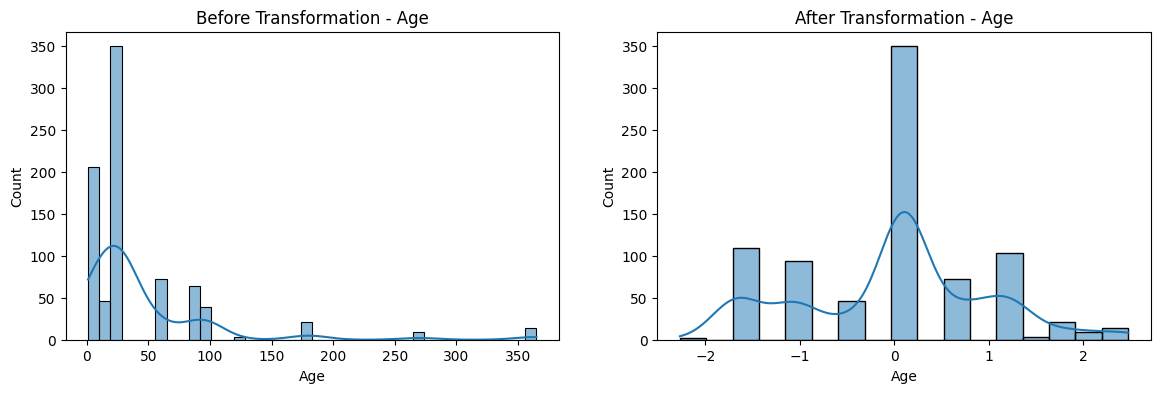

In [71]:
# Before and After Plot
X_train_transform2 = pd.DataFrame(X_train_transform2, columns=X_train.columns)

for col in X_train_transform2.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(X_train[col], kde=True)
    plt.title(f"Before Transformation - {col}")

    plt.subplot(122)
    sns.histplot(X_train_transform2[col], kde=True)
    plt.title(f"After Transformation - {col}")

In [72]:
# COmparing Values side-by-side
pd.DataFrame({'Columns': X_train.columns, 'Box-Cox': pt.lambdas_, 'Yeo-Johnson': pt1.lambdas_})

,Columns,Box-Cox,Yeo-Johnson
0,Cement,0.169544,0.213025
1,Blast Furnace Slag,0.016633,0.020476
2,Fly Ash,-0.136480,-0.038218
3,Water,0.808438,0.958936
4,Superplasticizer,0.264160,0.304951
5,Coarse Aggregate,1.129395,1.192751
6,Fine Aggregate,1.830763,1.975085
7,Age,0.001771,-0.062443
